## Purpose

The intentions for this notebook are to explore the possible optimization routes to take so that I can optimize a schedule revolving around recall and office hours. What are some of the key concepts?

### Objects At Play

Some of the objects that exist in the program are:
- *Modules*: These are a single cohesive set of objects that must be learned together in order to be most faithful to the curriculum
- *Units*: Contained within modules, each unit has a type that must follow the other unit type in order for it to make any sense
- *Schedule*: This is where the information about what to do and when to do it will be displayed.
 - There are a few schedule items that are *fixed* such as office hours, lectures, discussions, etc.
 - Some unit types must be scheduled *before* a particular fixed type. For example, a first exposure to a discussion should occur *before* the fixed discussion section is scheduled.

## Approach

We're gonna play around with the approach here. So we have some number $ x $ that represents a timestamp at which a particular kind of unit must be done. Lets say that the unit timestamp is $ a^* $ (some timestamp that we are trying to compute). What requirements should $ a^* $ meet?
- Should be before x
- Should not interfere with any other activities

So we have $ A^* = \{a \in A | a < x\} $

This is the set of all possible solutions to this particular small problem. Now the issue is that there are *many* fixed dates and *many* items to schedule per fixed date. So maybe lets imagine what a vector of timestamps would look like.

$$ a^* \in \mathbb{R}^n \text{ s.t. } a_{i}^{*} < x; i = 1,2,...,n $$

But actually there are greater requirements than that. Each unit takes up a *block* of space so that, in fact, each unit must be time stamped at a time *less than* $ x - b $, where $ b $ is the size of the block for the unit. For now we're gonna assume that each unit has the exact same $ b $ as every other unit. Ok so now we have a rather complicated vector.

$$ a^* \in \mathbb{R}^{n+1} \text{ s.t. } a_{i+1}^* \geq a_{i}^* + b; a_{n} + b \leq x; i = 1, 2,...,n, b \in \mathbb{R}^{n+1} $$

Ok but this doesn't take into account the fact that we also have $ x $ to worry about. Not a problem, we can just add $ x $ to the end of the vector and that will ensure that we have the right time. So now what? There have to be a few things that are true about this recursive definition of the vector. So, for example, we can note that

$$ a_{i+1}^* - a_{i}^* \geq b; i = 1, 2, ..., n-1 $$

Since b is a known value, we can probably do a matrix operation on the vector and see if the result matches a particular constraint.

A matrix like this should always be solvable, so we can actually create a linear system such that

$$ Ta^* \geq b $$

and then solve for $ a^* $, where $ T $ is the matrix that does all of the proper operations. Now this is the overly simplified case because there are *multiple* fixed objects with *different* time blocks that have their own units that have to be scheduled *before* their particular assigned fixed item. Then there are cases where something needs to be scheduled *after* something as well. So we'll need to consider those cases.

So we could just make b not entirely made up of a single constant. However, how would we make it work for multiple fixed constants? Well I mean, the constants themselves have to be compatible with the other constants, so that wouldn't be much of a problem. So for example, if there are 2 constant events scheduled at an interval $ y $ from each other, we could just add that constraint to the matrix. The question would be whether or not that matrix would be solvable. Now, because each set of units has to be less than a set number, and those numbers are also fixed to be ordered, then we get a perfectly ordered set of elements that will not coincide with each other.

## 8/3/2021

So lets begin by creating a sample matrix of what this might look like. Lets assume that we are using minutes as the numerical units in the system, and that there is a difference of 30 minutes between 2 events, one of which is fixed. There are 1440 minutes in a day, so lets just say that we have a fixed event at 720 minutes (noon) and we have another event about 60 minutes before that. So we have to create a system of linear equations that uses this info. Ok.

$$ \begin{bmatrix}
-1 & 1 & 0\\
0 & -1 & 1\\
\end{bmatrix} 
\cdot 
\begin{bmatrix}
a_1\\
a_2\\
x\\
\end{bmatrix} = 
\begin{bmatrix}
c_1\\
c_2\\
\end{bmatrix}$$

So obviously after thinking through it more carefully I was wrong about it having a particular solution, which is good because redundancy allows us to create a few more optimizations if need be. Either way, now we have a space of solutions which is dope. We can also constrain the times in which these events occur (so we don't get any midnight solutions). 

## 8/8/2021

K so I ended up making some modifications to the problem I have to solve. Its not a redundant vector space, after all. There is a particular solution at least in the solving of the equality. So for example we originally had the above SLE, but then my dumbass realized that we can do something like

$$ \begin{bmatrix}
-1 & 1\\
0 & -1\\
\end{bmatrix} 
\cdot 
\begin{bmatrix}
a_1\\
a_2\\
\end{bmatrix} = 
\begin{bmatrix}
b_1\\
b_2 - x\\
\end{bmatrix}$$

And clearly this admits a particular solution. So now we have an $ a^* $ that solves the problem $ Ta^* = c_t $ and we can use that to get an upper bound on $ Ta^* \leq c_t $. Which works great cuz I found out a possible optimization that we could do that sounds useful.

#### Optimization: Maximize time between events
So maybe you've come up with it logically (like I did after I did this whole proof thing and now I feel dumb) but if you feel like looking at a math proof that supports the logical position, here it is.

*Theorem*: Let $a \in \mathbb{R}^n$ be a vector that represents successive timestamps (i.e. they're times in order of occurence so they are guaranteed to be increasing). Then the solution to the problem

$$ \begin{equation}
\begin{aligned}
\max_{a_t}\left(\sum_{i=1}^{n-1}a_{i+1} - a_i\right),\\
t=1, 2, \ldots, n\\
\end{aligned}
\end{equation}
$$

is given by $a^* \in \mathbb{R}^n$, which is defined as follows: choose $ a^*_1$ to be the lowest possible value, $ a^*_n $ to be the highest possible value, and have $a^*_2, a^*_3,\ldots a^*_{n-1}$ be chosen such that $a_{p+1} - a_{p} = q$ for any $ p \in \left[2,n-1 \right]$ and any $ q  \in \mathbb{R}_n$.

*Proof*:
We can rewrite the above sum as
$$ \begin{equation}
\begin{aligned}
\max_{a_t}\left(\sum_{i=2}^{n}a_{i} - \sum_{i=1}^{n-1}a_i\right),\\
t=1, 2, \ldots, n\\
\end{aligned}
\end{equation}
$$
which, by logic of max and min, can be rewritten as
$$ \begin{equation}
\begin{aligned}
=\max_{a_t}\left(\sum_{i=2}^{n}a_{i}\right) - \min_{a_t}\left(\sum_{i=1}^{n-1}a_i\right),\\
t=2, 3, \ldots, n
\end{aligned}
\end{equation}
$$

(Now this is where I get kind of mixed up in the proof) In order to arrive to the proposed solution, we must assume the opposite. That is, assume that there exists a solution s.t. you don't have to choose the a's in the way that I've mentioned. (I get lazy here, I'll explain once you read). If we try to minimize the min part of the expression, you are inherently making it impossible the maximize the max part of the expression (thus not maximizing the whole expression). Similarly, if you focus on only maximizing the left side of the expression, then you inherently make it impossible to minimize the right side of the expression (again, thus failing to maximize the entirety of the expression). (And this is where I'm stuck. I know intuitively why this must be the right solution, but I'm just not getting the justification right). Cool thanks for coming to my ted talk.

## 8/9/2021

There's something wrong with the above formulation. Obviously these two sums cancel out so that the max turns out to be maximizing the first element and minimizing the other.

## 8/11/2021

This gave me an answer that doesn't have any useful information about the rest. This is because we can rewrite the whole thing as

$$ \begin{equation}
\begin{aligned}
a_n + \sum_{i=2}^{n-1}a_{i} - \sum_{i=2}^{n-1}a_{i} - a_1\\
t=2, 3, \ldots, n
\end{aligned}
\end{equation}
$$

Basically we're eliminating the overlap between the two summations. At that point the problem becomes maximizing the last event's value and minimizing the first event's value. This doesn't give us any information about how to arrange the middle events. But what kind of information would give us that? Does it even matter? Maybe I'm asking the wrong questions... I got caught up in the math a bit so I think I can just use the pomodoro technique to create the appropriate blocks of time. I also kind of want to vary the kinds of activities and the subject that they're based in. So for example I would have a reading in Stat 134 but a discussion preview in EECS 127 right after that (attempting to do the problems at least before the discussion section in order to have proper context). But for now, in order to get back to the coding of the actual program, I think I'll simply give each event its own spot according to type.

But how will the software recognize a schedule? Is it simply a field in each of the units? Or is it a separate object? We aren't necessarily doing OOP and I think it would be premature optimization to try and mimic OOP within the context of a JSON datastore, so maybe we should just create a field within each unit to schedule each one of them. But how and when would we do that? Well we really only need a specific amount of information. We only need the class-specific fixed events, for example labs and homeworks and such. For now we can schedule all of the readings together, all of the discussions together, all of the homework attempts together, etc...; now, my question would be when do we make it adaptive? We're trying to make it as usable as possible, and setting things in stone makes it kind of less usable? For now let's get the scheduling down. So I think we should first create a schedule on the week level. In order to do that, we need to be able to set our work week. In order to set the work week, we need to sets boundaries on what range of hours the person is actually gonna work. That way we can compute the schedule for the whole week accordingly.

![Planning The Next Steps](scheduling.png)

So now to design this thing, it seems kind of straightforward. We really just need to ask the user if they have any block out times, and then add them to a list. That should be easy enough. So now what about the computation of the schedule? Well it should be done really only if parameters have changed. For example, if the set of fixed events have changed, then we could do a recompute. Or when the person has decided that they want to block out another chunk of time. There should be a flag that sets that every time there occurs a critical change, then. That way we can send the Numpy server the right information at the right time.

## 8/12/2021

So we're trying to decide the logic for when to recalculate the events to different times. So far we have that the times should be recalculated when: 
- The user changes the time of a fixed event.
- The user changes a blocked out span of time.
- The user changes their active hours.

How would the recompute work? Maybe it would be a purely database thing. Or maybe it's a queue thing? No, the changes should be represented directly after there is a change in one of the three above. So the following would happen

![When are we going to compute?](Computation.png)

The math for the recompute basically works exactly the same: we just label the events as something different and compute them exactly the same way we would compute the other ones. So I guess since I have the primary sets of things that are required for the app to work well, now we need to figure out how it's all gonna fit together. Should I use a microservices architecture or should I just use a monolith? It's probably smarter to go with microservices but the monolith is definitely easier. Either way, let's observe our options.

## 8/16/2021

We're just gonna assume that the system is up and works well. In that case, we're going to create the GraphQL architecture required to take the data and turn it into a view. So let's look at how we'd do that. My instincts tell me that the thing that will be the most difficult to plan will be the flag. So where will the flag be used the most? Well there are a few places where it could be used:

- View of classes
- View of a single class
- Changing settings for a class

It looks like the third one might be the primary use for changing and the other ones would simply be observers. That seems like the right thing. I might have to do some GraphQL review to know how that's gonna translate into the architecture.

### Remembering GraphQL

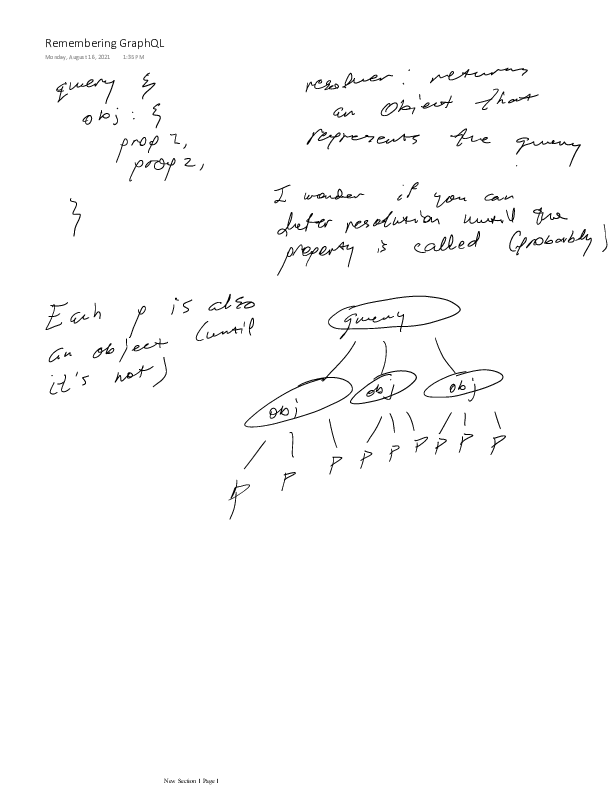

In [1]:
from wand.image import Image as WImage
img = WImage(filename='remembering-graphql.pdf')
img

Essentially each object queried has a resolver, and each of that object's properties has a resolver as well that can reference the parent's resolved data. The resolvers are only called if their respective properties are included in the query. So now what's left to do is design the pages and queries that they will be taking.

## 8/17/2021

For now we're going to just focus on scheduling 3 classes and then we'll design the cases that are of concern. So if we want to schedule 3 classes, then we need to get the following working:

- Inputting information relevant to each class
- Generating schedules for the particular classes
- Scope resolution.

Let's talk about scope resolution for a bit. This is what I'm talking about:

1. The schedule for a week gets full
2. There is space in the rest of the month to push some of the stuff over.
3. We try to solve the equation for the whole month??? or for like the next couple of weeks?

I don't know how to approach that. I guess we can start by asking what we'd like to see in a schedule. Then we can start asking how that would affect the software. So let's assume that the schedule is full. Then what?

- The SLE won't solve

^^^ So once we ge the flag that the SLE is unsolvable, what do we do? We would have to 
- Update the matrix to include all of the events that are occuring in the (next week)?
- Recalculate the matrix so that both weeks are accounted for and can take both sets of events.
- Just keep doing that until we find a set of time that creates a solvable matrix.

After that's done, how are we going to update the individual events? Well the events would go something like Attempt to create event -> Get an unsolvable matrix -> Increase timespan to solve (xN) -> Update events.

Right now the only time that we would need to create a new event is when we create a new class (or modify an existing class). So the system would at least need to be able to handle that. So I guess the next question would be: how do we get from using the UI to schedule things to actually viewing a schedule of when you should be doing stuff?

Update: So the issue with creating a separate NumPy server to do the linear algebra computations is that there is a need to know how the conversions in time are going to happen. Here's the workflow:

Do something in UI that requires a change -> Business Logic in GraphQL server recognizes that a particular event requires recomputation -> GraphQL server sends NumPy server request to recompute using data -> NumPy server needs access to data

I think I could solve this by simply having both machines have access to the same database. That way instead of having to use an intermediary server just to do the time conversions for the two, yeah.

The issue now then is that I would have to have an alert service to let the web app know that the database has been updated. Would that require something like a Redis server that raises a flag when something is already up?

The alternative is that it all gets handled in a single request, so that something like:

GraphQL requests a function to convert database info into something readable by NumPy -> GraphQL server sends data over to NumPy server with data converted -> NumPy does computations -> NumPy gets function from conversion service to convert response back to GraphQL server-readable data -> NumPy sends converted data to GraphQL server in the same request.

The problem with ^^^ is that the user is going to wait a long time if the NumPy server takes a while to compute. Additionally, if we decide we want to add further optimizations, doing everything within the time of a single request is probably not a good idea. Therefore, the other architecture is probably the ideal one.